# Regressão Logistica

A regressão logistica é um método de classificação.

## Pimas
Um conjunto de dados sobre diabetes, pelo nome "Pimas Indians diabetes dataset"
Kahn,Michael. Diabetes. UCI Machine Learning Repository. https://doi.org/10.24432/C5T59G.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column_names = ['gravida',
               'glucose',
               'pressao',
               'pele_mm',
               'insulina',
               'bmi',
               'pedigree_func',
               'idade',
               'target']

In [3]:
features_names = column_names[:-1]

In [4]:
all_data = pd.read_csv("diabetes.csv")

In [5]:
all_data.columns = column_names

In [6]:
all_data.head(3)

,gravida,glucose,pressao,pele_mm,insulina,bmi,pedigree_func,idade,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [7]:
all_data.describe()

,gravida,glucose,pressao,pele_mm,insulina,bmi,pedigree_func,idade,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- É possível a pele_mm ser zero?
- é possível o nível de insulina ser zero?
- glucose zero, pressão sanguínea zero, pele em mm zero, nível de insulina zero, são caracteristicas impossíveis num ser humano

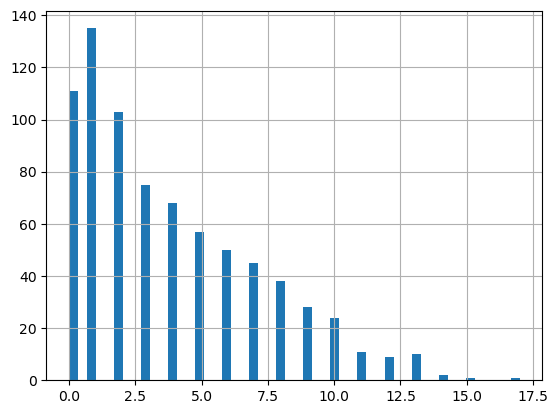

In [8]:
# visualizando histograma da variável "gravida"
%matplotlib inline
all_data.gravida.hist(bins=50)
plt.show()

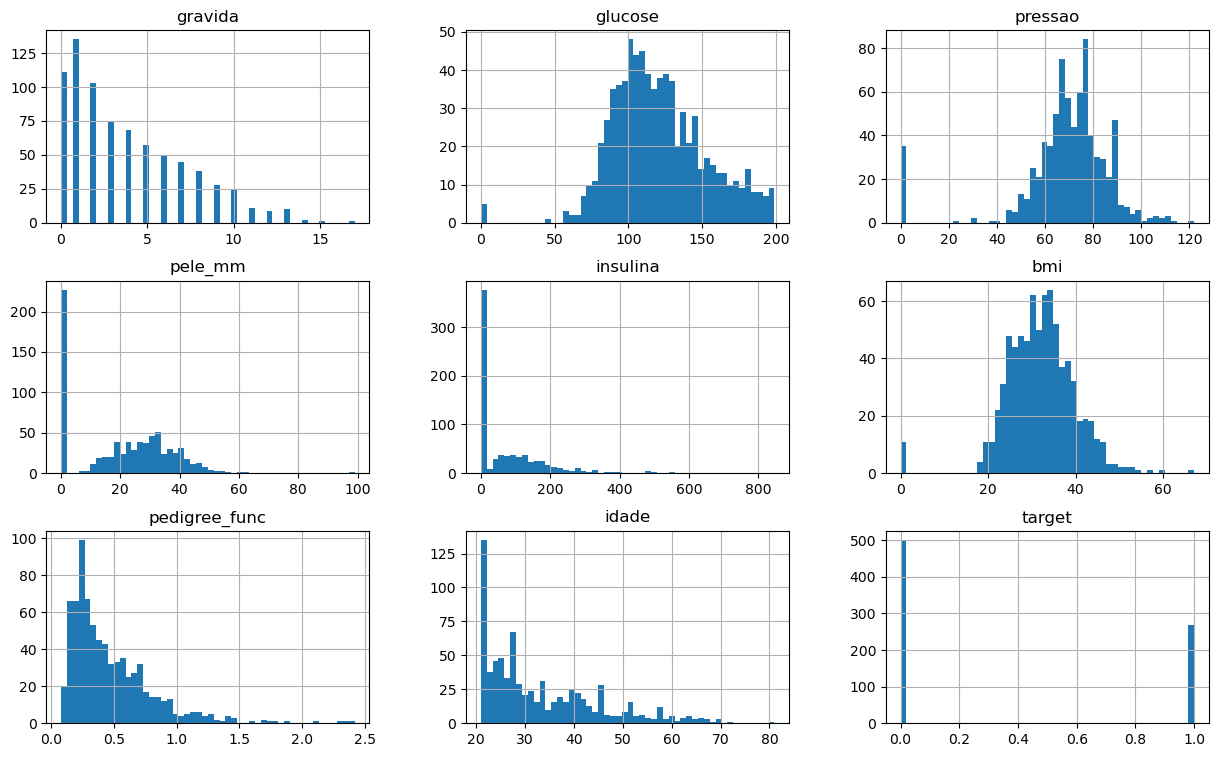

In [9]:
#visualizando tudo
all_data.hist(figsize=(15,9), bins=50)
plt.show()

> Pressão e bmi parecem ter uma distribuição normal, tirando anomalia dos zeros

In [10]:
all_data.target.value_counts()

target
0    500
1    268
Name: count, dtype: int64

In [11]:
all_data.shape

(768, 9)